In [189]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
sns.set()

In [190]:
#import data
exercise_data = pd.read_excel('C:/Users/ckalib.nelson/Desktop/export/apple_health_export/Raw Avg Health Data.xlsx')

In [191]:
#see 2019 results of exercrise data
exercise_data

,Month,Avg. Energy Burned per Day (kcal),Avg. Exercise Time per Day (minutes)
0,Jan,468.265581,37.354839
1,Feb,509.757143,43.750000
2,Mar,488.990806,43.096774
3,Apr,555.573600,52.800000
4,May,501.381935,47.612903
5,Jun,555.274133,50.833333
6,Jul,571.587097,57.645161
7,Aug,514.265033,48.233333
8,Sep,451.952633,38.033333
9,Oct,491.932387,36.000000


In [192]:
#view the dataset size
exercise_data.size

36

In [193]:
#view the shape of the dataset
exercise_data.shape

(12, 3)

In [194]:
exercise_data.columns

Index(['Month', 'Avg. Energy Burned per Day (kcal)',
       'Avg. Exercise Time per Day (minutes)'],
      dtype='object')

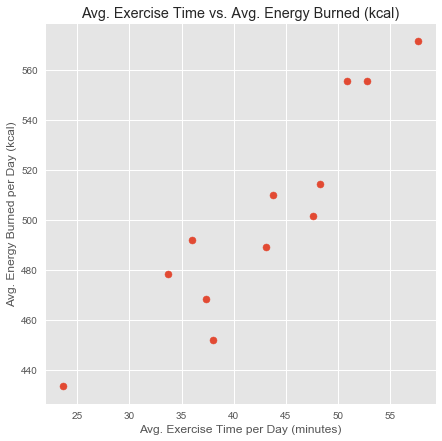

In [195]:
#plot scatter plot
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(exercise_data['Avg. Exercise Time per Day (minutes)'],exercise_data['Avg. Energy Burned per Day (kcal)'])
plt.title('Avg. Exercise Time vs. Avg. Energy Burned (kcal)')
plt.ylabel('Avg. Energy Burned per Day (kcal)')
plt.xlabel('Avg. Exercise Time per Day (minutes)')
plt.show()

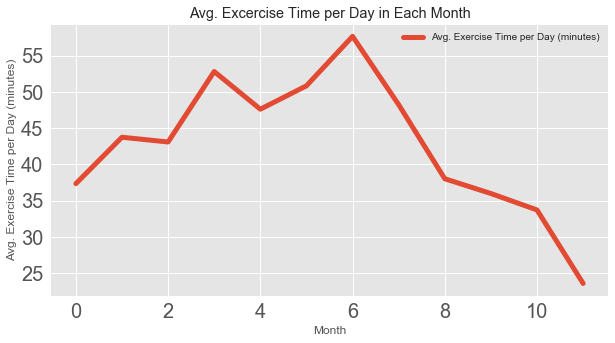

In [196]:
#plot time series of Avg. Exercsie Time per Day (minutes) in 2019
exercise_data[['Avg. Exercise Time per Day (minutes)']].plot(figsize=(10,5), linewidth = 5, fontsize=20)
plt.ylabel('Avg. Exercise Time per Day (minutes)')
plt.xlabel('Month #')
plt.xlabel('Month')
plt.title('Avg. Excercise Time per Day in Each Month');

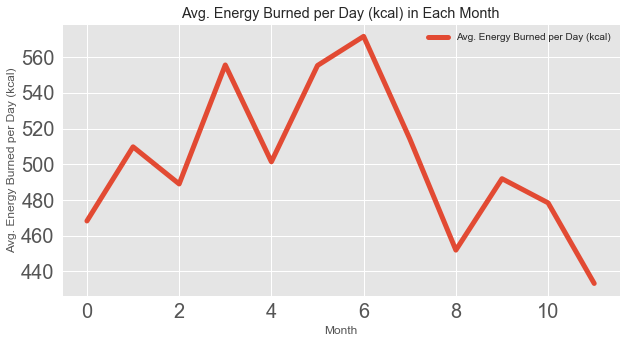

In [197]:
#plot time series of Avg. Energy Burned per Day (kcal) in 2019
exercise_data[['Avg. Energy Burned per Day (kcal)']].plot(figsize=(10,5), linewidth = 5, fontsize=20)
plt.ylabel('Avg. Energy Burned per Day (kcal)')
plt.xlabel('Month #')
plt.xlabel('Month')
plt.title('Avg. Energy Burned per Day (kcal) in Each Month');

In [198]:
#assign features on X axis
x_features = exercise_data[['Avg. Exercise Time per Day (minutes)']]

# assign target on Y axis
y_target = exercise_data[['Avg. Energy Burned per Day (kcal)']]

In [199]:
#import linear model - the estimator
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()

In [200]:
#fit data into the estimator
lineReg.fit(x_features,y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [201]:
#train model split the whole dataset into train and test datasets
from sklearn import cross_validation
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x_features,y_target)

In [202]:
#print shapes of the training and testing data sets
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9, 1) (3, 1) (9, 1) (3, 1)


In [203]:
#fit the training sets into the model
lineReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [204]:
#print the intercept and coefficients
print (lineReg.intercept_)
print (lineReg.coef_)

#linear regression equation: y = b(intercept)0+ b1(input features)*x(coefficient of x)
# y = 330 + 4x

[339.17147888]
[[3.8370072]]


In [205]:
#prediction
y_pred = lineReg.predict(x_test)
y_pred

array([[541.76545902],
       [507.04054386],
       [485.10565271]])

In [206]:
#import required libraries for calculating MSE (mean square error)
import numpy as np
from sklearn import metrics

#calculate the mean square error (MSE)
print (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

20.793968363880914


In [207]:
#calculate variance
print ('variance score is %.2f' % lineReg.score(x_test,y_test))

variance score is 0.76
